In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./churn_prediction.csv")

In [3]:
data

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT


In [6]:
numerical_col = data.select_dtypes(["int","float"]).columns

In [7]:
numerical_col

Index(['customer_id', 'vintage', 'age', 'dependents', 'city',
       'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [9]:
data[data["current_balance"] == data["current_balance"].min()]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
12608,13467,2140,80,Male,0.0,retired,1096.0,1,27,-5503.96,...,1694.57,868.26,9471.01,2680.04,15229.44,7859.37,1050.17,2002.97,1,2019-12-26


In [10]:
data[data["current_balance"] == data["current_balance"].max()]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
9908,10575,2223,90,NaN,NaN,self_employed,243.0,2,2542,5905904.03,...,5700289.57,5010170.1,5232.34,1452.87,17327.27,17248.3,5778184.77,5720144.5,0,2019-12-13


In [11]:
data[numerical_col].max()

customer_id                          30301.00
vintage                               2476.00
age                                     90.00
dependents                              52.00
city                                  1649.00
customer_nw_category                     3.00
branch_code                           4782.00
current_balance                    5905904.03
previous_month_end_balance         5740438.63
average_monthly_balance_prevQ      5700289.57
average_monthly_balance_prevQ2     5010170.10
current_month_credit              12269845.39
previous_month_credit              2361808.29
current_month_debit                7637857.36
previous_month_debit               1414168.06
current_month_balance              5778184.77
previous_month_balance             5720144.50
churn                                    1.00
dtype: float64

(array([ 343.,  531., 1902., 4989., 6135., 4886., 3849., 2984., 1392.,
        1371.]),
 array([ 1. ,  9.9, 18.8, 27.7, 36.6, 45.5, 54.4, 63.3, 72.2, 81.1, 90. ]),
 <BarContainer object of 10 artists>)

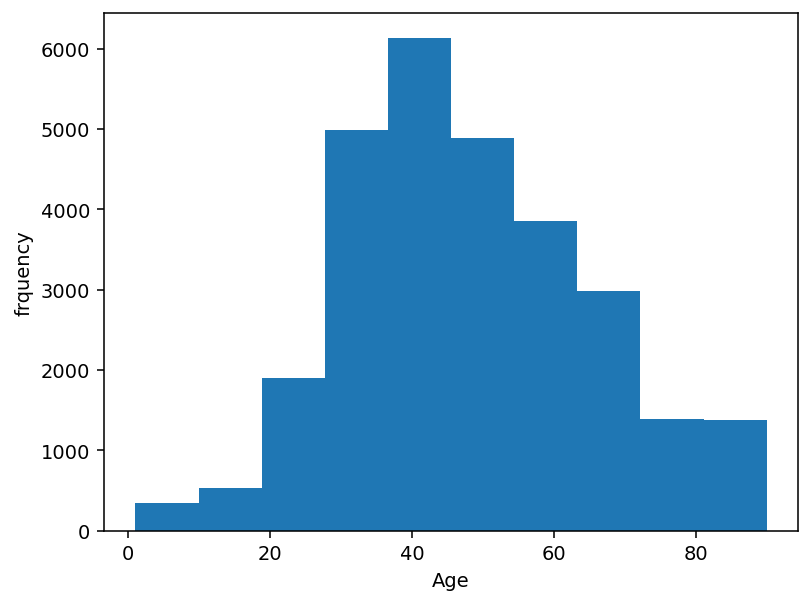

In [18]:
plt.figure(dpi= 140)
plt.xlabel("Age")
plt.ylabel("frquency")
plt.hist(data["age"])

In [19]:
data["age"].skew()

0.33058929557517264

In [23]:
data["age"].kurtosis()

-0.16866785691275865

(array([2.0000e+00, 7.0000e+00, 3.8000e+01, 7.1000e+01, 2.9100e+02,
        7.9200e+02, 2.0040e+03, 4.9560e+03, 1.0197e+04, 1.0024e+04]),
 array([  73. ,  313.3,  553.6,  793.9, 1034.2, 1274.5, 1514.8, 1755.1,
        1995.4, 2235.7, 2476. ]),
 <BarContainer object of 10 artists>)

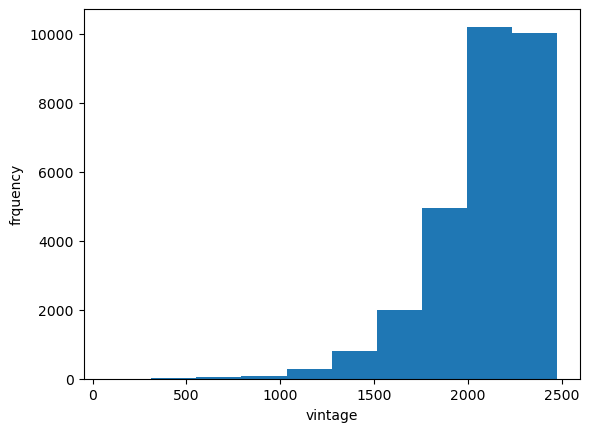

In [29]:
plt.xlabel("vintage") 
plt.ylabel("frquency")
plt.hist(data["vintage"])

# discrate disterbution

In [32]:
data["gender"].value_counts()

gender
Male      16548
Female    11309
Name: count, dtype: int64

In [33]:
data['gender'].value_counts()/ sum(data['gender'].value_counts().values)

gender
Male      0.594034
Female    0.405966
Name: count, dtype: float64

In [35]:
data['gender'].value_counts(normalize = True)

gender
Male      0.594034
Female    0.405966
Name: proportion, dtype: float64